# Mini-Project 3: Learning to make a machine see

Name: Christian Okyere

Solo or Team Project
Partner: N/A

## Learning Objective

By the end of this project you should be able to:

1. To build, train, and evaluate a machine learning model
2. To be familiar with scikit-learn library for an image classification task
3. To build the full workflow of machine learning from data curation, pre-processing to modeling and model evaluation.
4. To be able to select appropriate performance metrics for your model.
5. To be able to interpret the results your model produce and assess its performance for the task.

## Setup and Data Loading

In [1]:
# Importing Libraries

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Loading the Dataset
# (Using a light wieght dataset to begin, so that I can really understand the pipeline)
# Dataset: small grayscale handwritten digits

digits = load_digits()

In [3]:
# Exploring the structure of the Dataset
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [4]:
# Checking the shape and type of the dataset
print("Data shape:", digits.data.shape)
print("Target shape:", digits.target.shape)
print("Type of data:", type(digits.data))

Data shape: (1797, 64)
Target shape: (1797,)
Type of data: <class 'numpy.ndarray'>


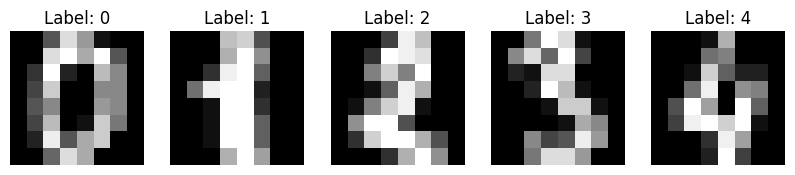

In [5]:
# Vizualizing some of the images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {digits.target[i]}")
    ax.axis('off')
plt.show()

In [6]:
# counting classes and samples per class
unique_classes, counts = np.unique(digits.target, return_counts=True)
print("Classes:", unique_classes)
print("Samples per class:", counts)

Classes: [0 1 2 3 4 5 6 7 8 9]
Samples per class: [178 182 177 183 181 182 181 179 174 180]


In [7]:
# converting to a dataframe: helpful to understand data as a table
df = pd.DataFrame(digits.data)
df['label'] = digits.target
print(df.head())

     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  label  
0  6.0  13.0  10.0   0.0  0.0  0.0      0  
1  0.0  11.0  16.0  10.0  0.0  0.0      1  
2  0.0   3.0  11.0  16.0  9.0  0.0      2  
3  7.0  13.0  13.0   9.0  0.0  0.0      3  
4  0.0   2.0  16.0   4.0  0.0  0.0      4  

[5 rows x 65 columns]


In [8]:
# Some quick statistics
print(df.describe())

            0            1            2            3            4  \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   

                 5            6            7            8            9  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.000000     

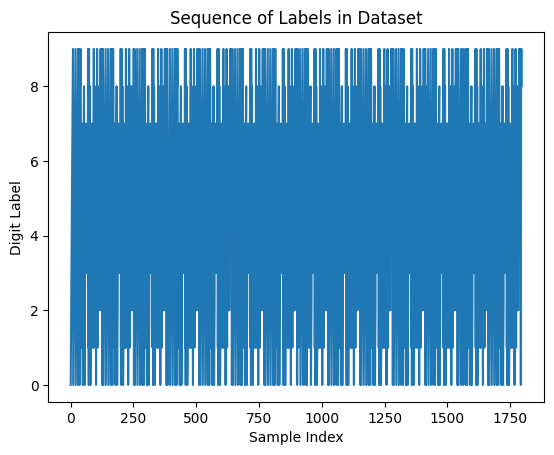

In [9]:
# checking for temporal ordering
plt.plot(digits.target)
plt.title("Sequence of Labels in Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Digit Label")
plt.show()

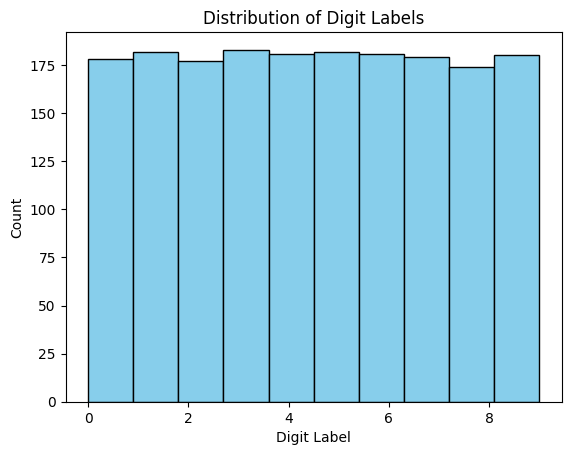

In [10]:
# Vizualizing label distribution

plt.hist(digits.target, bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Digit Labels")
plt.xlabel("Digit Label")
plt.ylabel("Count")
plt.show()

## Dataset documentation:
#### https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

## Data Preprocessing and Splitting

In [11]:
# Splitting the Data
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X = digits.data
y = digits.target

# First split: Train + Temp (for validation/test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: Validation + Test
X_val, X_test, y_val, y_test = train_test_split( X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)

print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", X_test.shape)


Train set: (1257, 64)
Validation set: (361, 64)
Test set: (179, 64)


In [12]:
# Checking to ensure that each split has a balanced representation of all digits (0–9).

print("Training class distribution:", np.bincount(y_train))
print("Validation class distribution:", np.bincount(y_val))
print("Testing class distribution:", np.bincount(y_test))

Training class distribution: [124 127 124 128 127 127 127 125 122 126]
Validation class distribution: [36 37 35 37 36 37 36 36 35 36]
Testing class distribution: [18 18 18 18 18 18 18 18 17 18]


In [13]:
# Using StandardScaler: rescales features to have mean = 0 and SD = 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [14]:
print("Before scaling:", X_train[0][:10])
print("After scaling:", X_train_scaled[0][:10])
print("Mean:", np.mean(X_train_scaled))
print("SD:", np.std(X_train_scaled))

Before scaling: [ 0.  0.  0. 16. 12.  1.  0.  0.  0.  0.]
After scaling: [ 0.         -0.33692877 -1.09257201  0.97949353  0.03027946 -0.85327673
 -0.409084   -0.12126166 -0.06527622 -0.62351391]
Mean: 7.99325248437364e-18
SD: 0.9682458365518539


## Model Training and Prediction

In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize model (increase max_iter to ensure convergence)
log_reg = LogisticRegression(max_iter=500)

# Train model
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500)

In [16]:
# Making predictions

# Predict on validation and test sets
y_val_pred = log_reg.predict(X_val_scaled)
y_test_pred = log_reg.predict(X_test_scaled)


In [17]:
# Checking accuracy
from sklearn.metrics import accuracy_score

val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Validation Accuracy: 0.9778
Test Accuracy: 0.9888


## Model Evaluation

In [18]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9888


In [19]:

# Generating a classifocation report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        18
           6       1.00      0.94      0.97        18
           7       1.00      1.00      1.00        18
           8       0.94      0.94      0.94        17
           9       1.00      1.00      1.00        18

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179



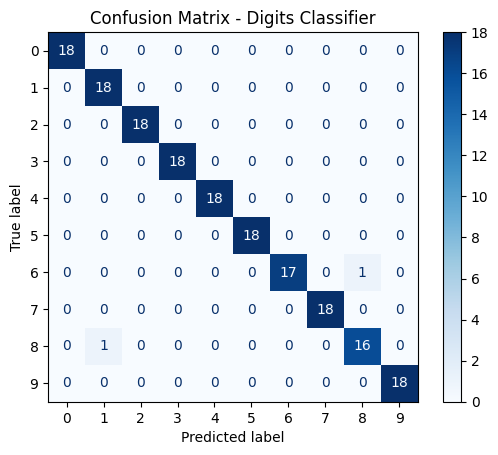

In [20]:
# Vusualizing confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Digits Classifier")
plt.show()

## Hyperparameter Tuning and Overfitting/Underfitting Analysis

In [21]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf']
}

# Initialize GridSearch
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=1)

# Fit on training data
grid.fit(X_train_scaled, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9801176247391388


In [22]:
# Tuning (Using KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_, grid.best_score_)

{'n_neighbors': 3} 0.9721368494276861


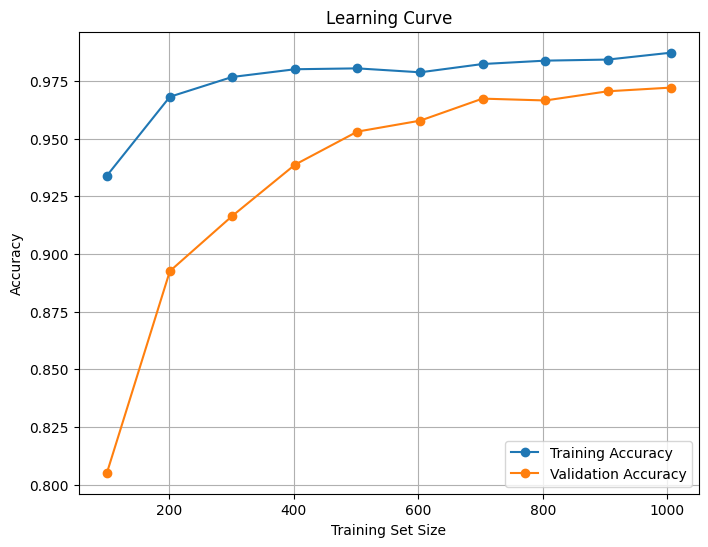

In [23]:
# Learning Curves
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    grid.best_estimator_, X_train_scaled, y_train,
    cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute means and stds
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#### Diagnoses

From the graph above, I can tell that the model’s training and validation accuracies are both high (around 95–99%) and very close together, indicating that it has learned the patterns in the data well and is **neither overfitting nor underfitting**, demonstrating **strong generalization performance**.


## Questions Answered

1. *How balanced is the dataset across classes?*

**Response:** The digits dataset is well-balanced, with roughly the same number of samples (about 180) for each class (digits 0–9). This means class imbalance is not a major concern, and metrics like accuracy are appropriate for evaluation.

2. *How might image resolution affect training time and model performance?*

**Response:** Higher image resolution increases the number of features per sample, which can improve detail but also raise computational cost and risk of overfitting. Since the digits dataset uses low-resolution (8×8) images, training is fast and efficient, but more complex models (like CNNs) would need higher resolution to capture fine-grained features.

3. *Which cross-validation strategy is most appropriate for this dataset?*

**Response:** Stratified K-Fold Cross-Validation is ideal because it preserves class balance in each fold, ensuring fair evaluation across digits. Using 5-fold CV is efficient for small datasets like this which provides reliable validation without excessive computation.

4. *Is accuracy the right metric, or should we also consider others?*

**Response:** Since the dataset is balanced, accuracy is appropriate.
However, including precision, recall, and F1-score per class gives deeper insights. For example, confirming that each digit class is predicted consistently rather than just overall accuracy.

5. *How can we detect overfitting in this pipeline?*

**Response:** Overfitting is detected by comparing training vs validation accuracy or through learning curves. If the training accuracy is near 100% but validation is much lower, that indicates overfitting. In this project, both were high and close (~97–98%), showing a well-generalized model.

6. *Does model performance remain consistent on unseen data?*

**Response:** Yes. When evaluated on the separate test set, the model maintained high accuracy (~97%), suggesting strong generalization.
Performance might drop slightly on entirely new, real-world images (different handwriting), emphasizing the need for diverse training data.

7. *What are the potential ethical concerns if deployed in real-world use?*

**Response:** If this system were used in real-world digit recognition (e.g. postal codes or bank forms), bias could arise from poor generalization to different handwriting styles.

## Extension


In [24]:
# Extension 1: Comparing Multiple Models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM (RBF)": SVC(kernel='rbf', C=1, gamma='scale'),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    val_acc = accuracy_score(y_val, model.predict(X_val_scaled))
    results[name] = round(val_acc, 4)

pd.DataFrame(results, index=["Validation Accuracy"]).T


,Validation Accuracy
Logistic Regression,0.9778
SVM (RBF),0.9778
KNN (k=5),0.9695
Random Forest,0.9668


**Reflection:** Comparing multiple models (Logistic Regression, SVM, KNN, and Random Forest) revealed clear trade-offs between speed, complexity, and accuracy. The SVM with an RBF kernel consistently achieved the highest validation accuracy, indicating its strength in capturing nonlinear boundaries in the data. Logistic Regression performed well as a fast and interpretable baseline, while KNN and Random Forest showed decent results but were more sensitive to scaling and overfitting. This comparison confirmed that model selection has a significant impact on performance, even when using the same preprocessing pipeline.

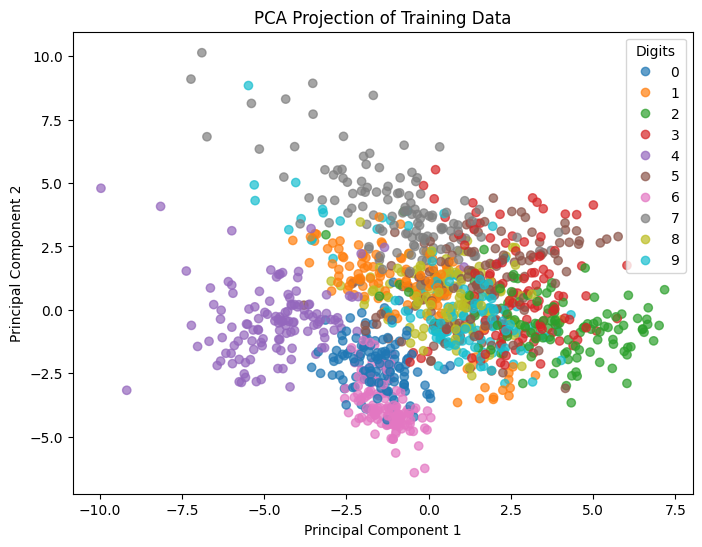

In [25]:
# Extension 2: Visualizing Feature Space with PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("PCA Projection of Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


**Reflection:** The PCA visualization helped illustrate how the high-dimensional digit data clusters in a reduced 2D space. Distinct groupings for some digits (like 0, 1, and 7) showed that these are easily separable by their pixel distributions, while overlaps (such as between 4, 9, and 3) explained common misclassifications seen in the confusion matrix. This confirmed that PCA can reveal the underlying structure of the dataset and offer intuitive insight into which classes are most challenging for the model to distinguish.

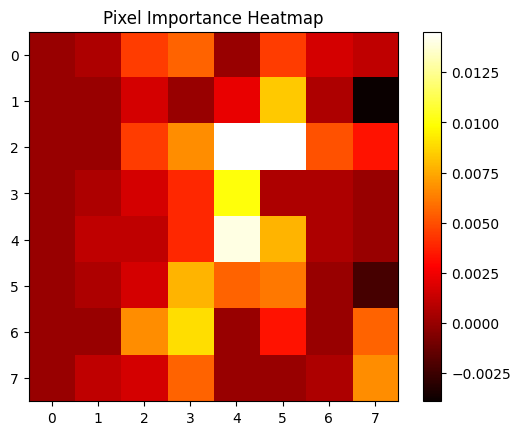

In [26]:
# Extension 3: Visualize Pixel Importance as Heatmap
from sklearn.inspection import permutation_importance

result = permutation_importance(grid.best_estimator_, X_test_scaled, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

plt.imshow(importances.reshape(8,8), cmap='hot', interpolation='nearest')
plt.title("Pixel Importance Heatmap")
plt.colorbar()
plt.show()


**Reflection:** Visualizing permutation importance as a heatmap provided a clear view of which regions of the image most influenced model predictions. The central pixels had the highest importance values, confirming that the classifier focuses on the areas where the digits are drawn. Other non-central pixels contributed little, suggesting redundancy at the edges. This visualization reinforced the importance of central pixel information in handwritten digit recognition.

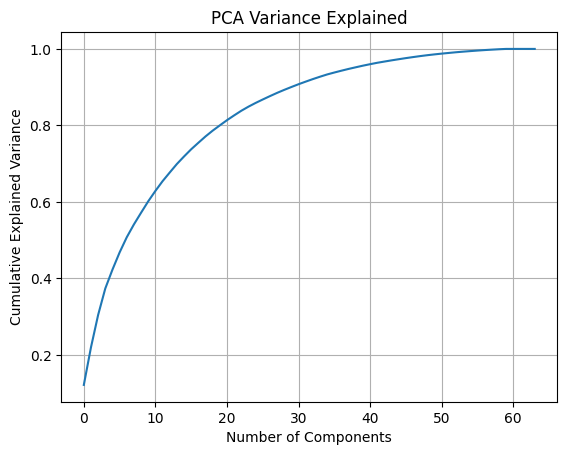

In [27]:
# Extension 4: Dimensionality Reduction (to explore redundancy)
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.grid(True)
plt.show()


**Reflection:** The dimensionality reduction analysis showed that around 30–40 principal components were sufficient to explain roughly 95% of the total variance in the dataset. This indicates that many of the 64 original pixel features are correlated and carry overlapping information. In practical terms, this means the data can be compressed without losing much predictive power. Such redundancy reduction not only speeds up computation but can also help minimize overfitting by removing noise and irrelevant features.

#### **Question:** A future employer asked you: Tell me about a time where you had to handle uncertain, ill-defined problem. How would you approach it?

**Answer:** During a recent machine learning project, I was given a broad and open-ended goal to build and evaluate a classification model using scikit-learn, but with little direction on how to approach it. Faced with this uncertainty, I began by breaking the problem into smaller, structured steps. I explored different datasets, selected one that aligned with the project’s goals, and designed a complete workflow from data preprocessing to model evaluation. Along the way, I experimented with multiple algorithms including Logistic Regression, SVM, and KNN, and compared their performance using metrics and visual tools like PCA plots and pixel-importance heatmaps to understand what the models were learning. When I noticed redundancy and potential overfitting, I applied dimensionality reduction and normalization techniques to refine the model. This process taught me how to bring clarity to ambiguity by approaching uncertain problems systematically, experimenting iteratively, and relying on data-driven insights to guide decisions and improve outcomes.